# Getting started with the Data Project on "Nepal Earthquake 2015"


The motivation is to look at the building damages and apply machine learning and statistical tools to model the damages against pre-earthquake parameters and estimate correlations on those parameters. This work currently focuses only on building damages on several districts, but there is a huge data on the demographics, socio-economic backgrounds etc. The data is obtained from ....

In [1]:
from pca_dist7 import load_building_data, get_change, plot_data, plot_3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Firt Load Data on building damages. The histogram shows the damage buildings in all of 31 districts

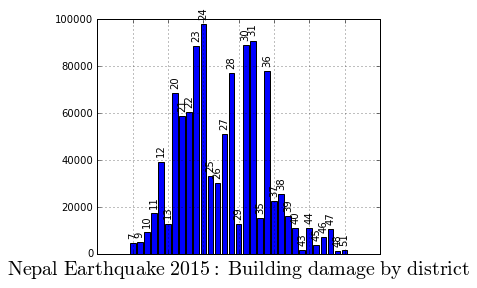

In [2]:
datafile='./csv_building_structure.csv'
data,target=load_building_data(datafile,district=30,plotdata=True)

Define the features in four parameters: [change in height of each building: pre - post earthquake height,
change in floor count: pre-post earthquake floor count, age of the building, and area of the building]

#- Looking at the data from district 30. A cut of 0 indicates no negative values. Height may increase due to debris but ignoring that for the moment.

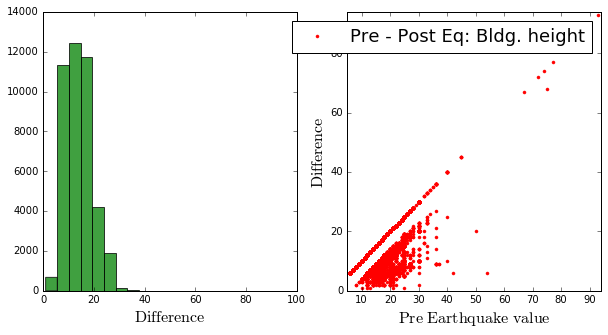

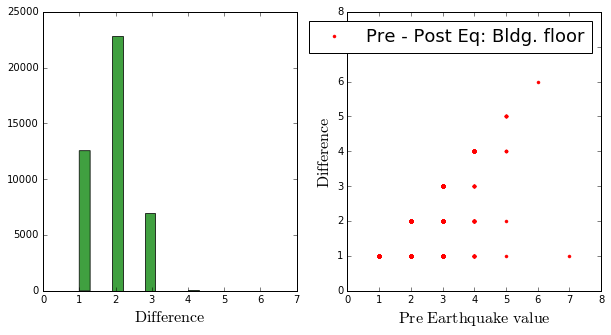

In [3]:
diff_ht=get_change(data,metric='height',plot=True,cut=0)
diff_fl=get_change(data,metric='floor',plot=True,cut=0)

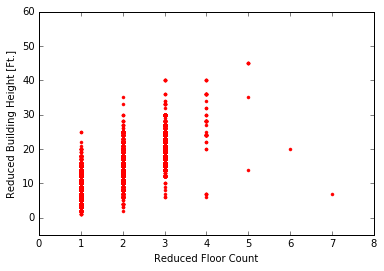

In [4]:
#- It is already interesting to see some correlation of height change with floor change
diff1=get_change(data,metric='height') #- no cut
diff2=get_change(data,metric='floor')
d1=diff1[diff1>0]
diff2=diff2[diff1>0]
plt.plot(diff2[diff2>0],d1[diff2>0],'r.')
plt.xlim(0,8)
plt.ylim(-5,60)
plt.xlabel('Reduced Floor Count')
plt.ylabel('Reduced Building Height [Ft.]')
plt.show()

One can already see a positive correlation (expected), but for each floor count variation, I am also interested to see how the mean and the rms varies. Potentially we can predict with some confidence that in a similar earthquake, quantitatively, how much damage will occur on a typical building of certain height. - Thing to do....

Now Moving further towards creating the [nsample x nfeature] space

In [6]:
age=data[:,3]
area=data[:,4]
age=age[diff1>0]
area=area[diff1>0]
tt=target[diff1>0]

a1=age[age<200]
d1=d1[age<200]
diff2=diff2[age<200]
area=area[age<200]
tt=tt[age<200]

st_data=np.array([a1,area,d1,diff2]).T


The target variable simply classifies the samples into 3 different categories of buildings: based on construction material: mud-mortar-Stone/Birck, Cement-Stone/Brick. and 'RC'. I don't know what 'RC' means, should follow up on the documentation. But treating that as a feature parameter for the moment.

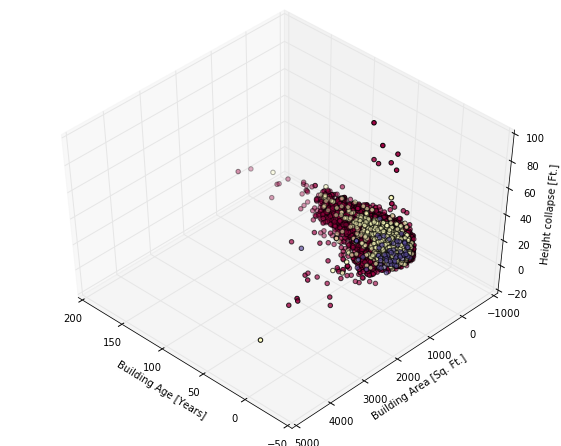

In [7]:
#- A 3D plot of the firs three features
plot_3D(st_data,tt)

Given these four features, I am trying to perform a PCA analysis, basing on 2 PCA components. The final goal is to figure the true correlations in these parameters and many others.



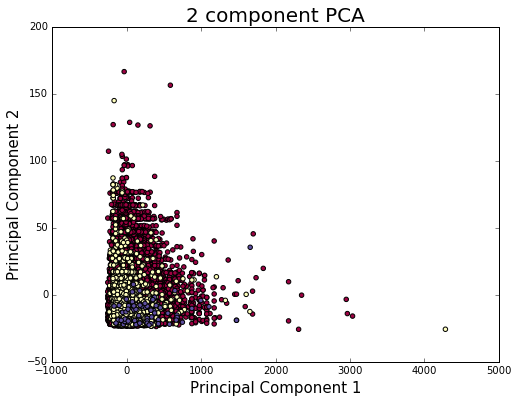

In [8]:
plot_3D(st_data,tt,pca=True)